=== Linear Regression Evaluation ===
MAE  : 120666.43851956047
MSE  : 30376148231.75463
RMSE : 174287.54468336122
R²   : 0.997055498513006

=== Cross Validation (R² Scores) ===
[0.9970555  0.99472634 0.99350626 0.99799496 0.99572175]
Average R²: 0.9958009623491548

=== Random Forest Evaluation ===
MAE  : 51227.22032142918
MSE  : 6343955339.2629385
RMSE : 79648.95064759447
R²   : 0.9993850508699337

=== Visualisasi Linear Regression ===


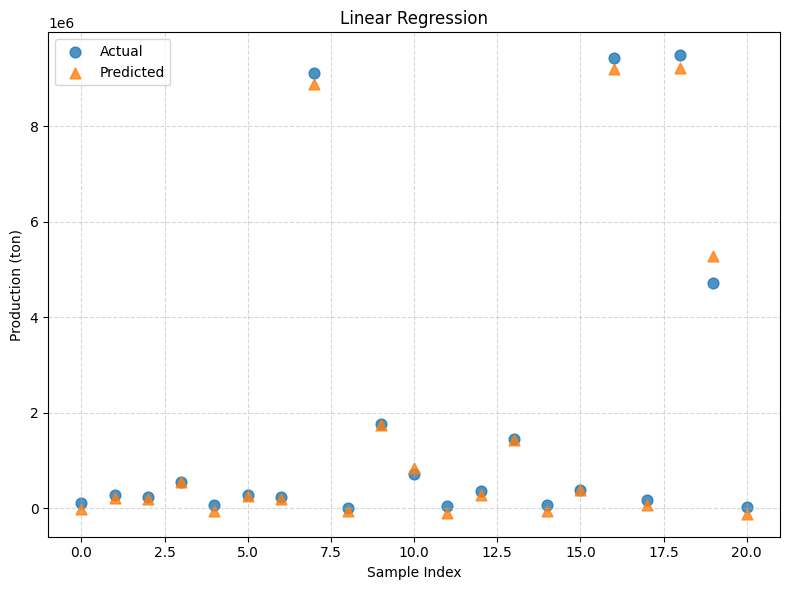


=== Visualisasi Random Forest ===


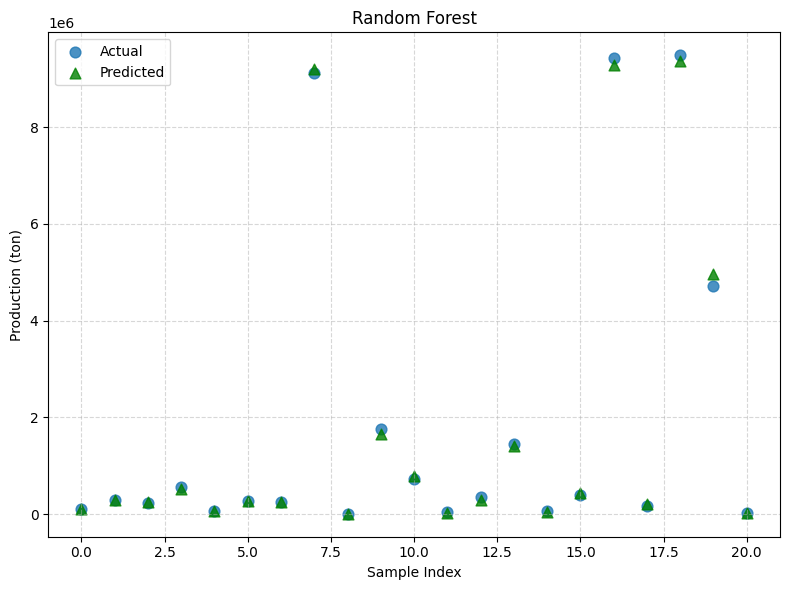


=== Visualisasi Perbandingan R² ===


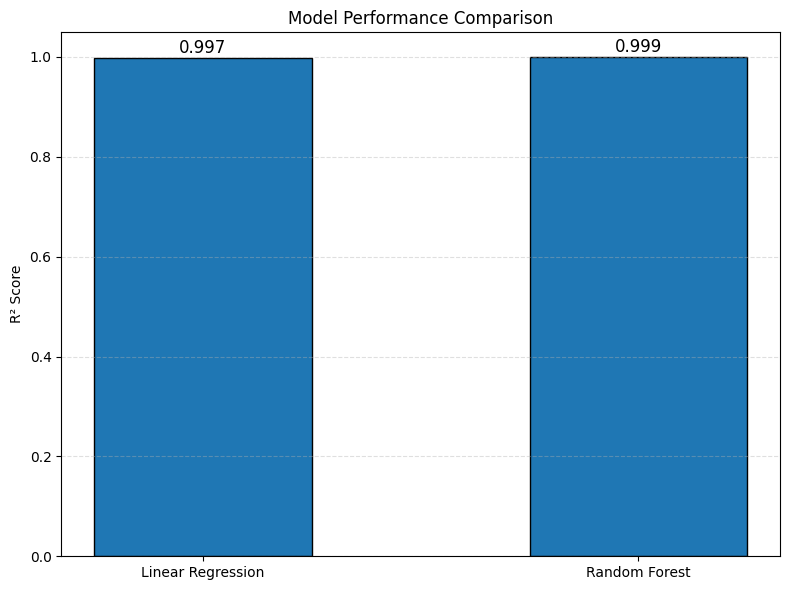

In [2]:
# === Import library ===
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# === Load dataset ===
df = pd.read_csv("Rice Production Indonesia 2020-2022.csv")

# === Encoding provinsi & siapkan fitur-target ===
df_encoded = df.copy()
df_encoded["Provinsi"] = df_encoded["Provinsi"].astype("category").cat.codes
X = df_encoded.drop("Production.(ton)", axis=1)
y = df_encoded["Production.(ton)"]

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Linear Regression (train & prediksi) ===
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

# === Evaluasi Linear Regression ===
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("=== Linear Regression Evaluation ===")
print("MAE  :", mae)
print("MSE  :", mse)
print("RMSE :", rmse)
print("R²   :", r2)

# === Cross-validation (KFold) ===
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(linreg, X, y, cv=kf, scoring='r2')
print("\n=== Cross Validation (R² Scores) ===")
print(cv_scores)
print("Average R²:", np.mean(cv_scores))

# === Random Forest (train & prediksi) ===
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# === Evaluasi Random Forest ===
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("\n=== Random Forest Evaluation ===")
print("MAE  :", mae_rf)
print("MSE  :", mse_rf)
print("RMSE :", rmse_rf)
print("R²   :", r2_rf)

# === Visualisasi: Linear Regression (Actual vs Predicted) ===
print("\n=== Visualisasi Linear Regression ===")
plt.figure(figsize=(8,6))
plt.scatter(range(len(y_test)), y_test, label="Actual", s=60, alpha=0.8)
plt.scatter(range(len(y_test)), y_pred, label="Predicted", s=60, marker='^', alpha=0.8)
plt.title("Linear Regression")
plt.xlabel("Sample Index")
plt.ylabel("Production (ton)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# === Visualisasi: Random Forest (Actual vs Predicted) ===
print("\n=== Visualisasi Random Forest ===")
plt.figure(figsize=(8,6))
plt.scatter(range(len(y_test)), y_test, label="Actual", s=60, alpha=0.8)
plt.scatter(range(len(y_test)), y_pred_rf, label="Predicted", s=60, marker='^', alpha=0.8, color='green')
plt.title("Random Forest")
plt.xlabel("Sample Index")
plt.ylabel("Production (ton)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# === Visualisasi: Perbandingan R² ===
print("\n=== Visualisasi Perbandingan R² ===")
plt.figure(figsize=(8,6))
bars = plt.bar(["Linear Regression", "Random Forest"],
               [r2, r2_rf],
               width=0.5,
               edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.3f}",
             ha='center', fontsize=12)

plt.ylabel("R² Score")
plt.title("Model Performance Comparison")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()